# パーセプトロンの分類器

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn import datasets

## パーセプトロンクラス作成

In [173]:
class Perceptron(object):
    """
    パーセプトロンの分類器
    eta: 学習率
    n_iter: トレーニング回数
    random_state: 重み初期化のための乱数シード
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1] + 1) # 重みを標準正規分布の平均0, 標準偏差0.01で初期化
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, yi in zip(X.values, y.values):
                delta = self.eta * (yi - self.predict(xi))
                # 重みの更新
                self.w_[1:] += delta * xi
                self.w_[0] += delta
                # 重みの更新が0でない場合は誤分類としてカウント
                errors += 1 if delta != 0.0 else 0
            # 反復ごとの誤差を格納
            self.errors_.append(errors)
        return self
    
    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        dotsum = np.dot(X, self.w_[1:]) + self.w_[0] # 重みベクトルとの積和
        return np.where(dotsum >= 0.0, 1, -1) # 重みとの積和が0以上ならば1を、そうでなければ-1を返す

## Irisデータセットでのトレーニング

In [70]:
# iris
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
#df_iris['class'] = iris.target
df_iris['class'] = iris.target_names[iris.target]
df_iris[::10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
10,5.4,3.7,1.5,0.2,setosa
20,5.4,3.4,1.7,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa
40,5.0,3.5,1.3,0.3,setosa
50,7.0,3.2,4.7,1.4,versicolor
60,5.0,2.0,3.5,1.0,versicolor
70,5.9,3.2,4.8,1.8,versicolor
80,5.5,2.4,3.8,1.1,versicolor
90,5.5,2.6,4.4,1.2,versicolor


In [71]:
# setosaとversicolorのみを抽出
df_iris_setosa = df_iris[df_iris['class'] == 'setosa']
df_iris_versicolor = df_iris[df_iris['class'] == 'versicolor']
df_iris = pd.concat([df_iris_setosa, df_iris_versicolor])
# setosaを-1, versicolorを1に変換
df_iris['class'] = df_iris['class'].map({'setosa': -1, 'versicolor':1}).astype(int)
df_iris[::10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,-1
10,5.4,3.7,1.5,0.2,-1
20,5.4,3.4,1.7,0.2,-1
30,4.8,3.1,1.6,0.2,-1
40,5.0,3.5,1.3,0.3,-1
50,7.0,3.2,4.7,1.4,1
60,5.0,2.0,3.5,1.0,1
70,5.9,3.2,4.8,1.8,1
80,5.5,2.4,3.8,1.1,1
90,5.5,2.6,4.4,1.2,1


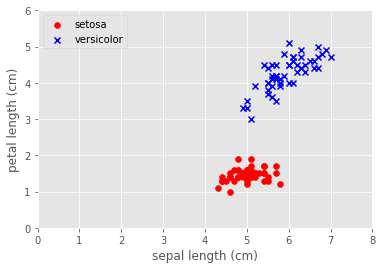

In [102]:
# プロット(sepal length * petal length)
X = df_iris.loc[:, ['sepal length (cm)', 'petal length (cm)']]
y = df_iris.loc[:, ['class']]
plt.scatter(X.iloc[:50,0], X.iloc[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X.iloc[50:100,0], X.iloc[50:100,1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.xlim(0, 8)
plt.ylim(0, 6)
plt.legend(loc='upper left')
plt.show()

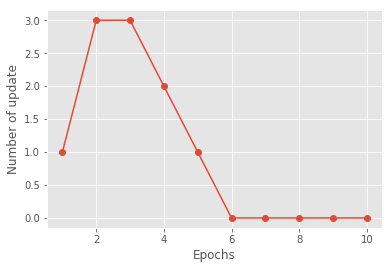

In [174]:
# トレーニング
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
# エポックと誤分類誤差の関係をプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of update')
plt.show()

In [220]:
# 決定境界を可視化
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # マーカーとカラーマップの用意
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # 決定領域のプロット
    x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果をもとのグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        px = X[y.values == cl].iloc[:, 0]
        py = X[y.values == cl].iloc[:, 1]
        plt.scatter(x=px,
                            y=py,
                            alpha=0.8,
                            c=colors[idx],
                            marker=markers[idx],
                            label=cl,
                            edgecolor='black')

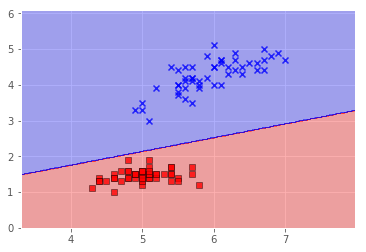

In [221]:
# 決定領域のプロット
plot_decision_regions(X, y, classifier=ppn)